# Packages

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline
sns.set_theme()

In [4]:
import warnings

warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('data/loans_full_schema.csv')

# Data type and Missing values

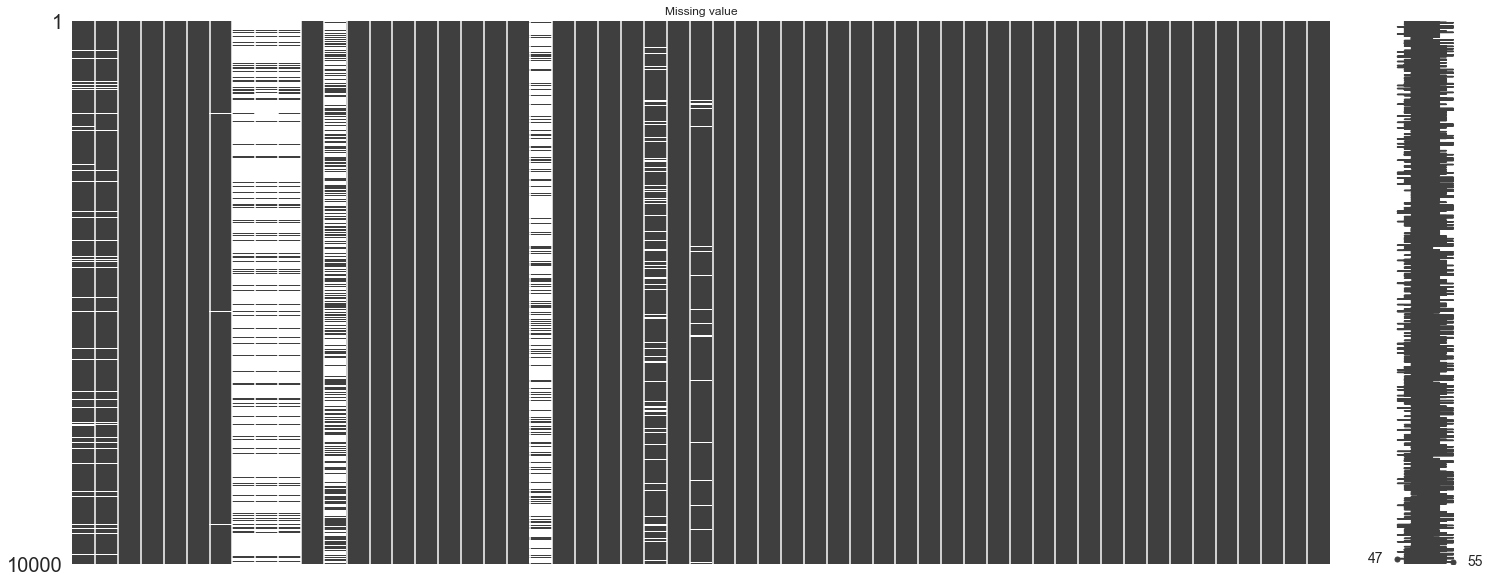

In [6]:
import tkinter
import missingno as msno
# missing value EDA
# reference: https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
msno.matrix(data)
plt.savefig('doc/Missing value.png')
plt.title('Missing value')
plt.show() 

In [7]:
missing_prof = data.isnull().sum().sort_values(ascending=False)/data.shape[0]
data = data.drop(missing_prof[missing_prof>0.5].index,axis=1)

In [8]:
from dabl import detect_types
data_types = detect_types(data)
data_types.reset_index(drop = False)

,index,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
0,emp_title,False,False,False,False,False,True,False
1,emp_length,True,False,False,False,False,False,False
2,state,False,False,False,True,False,False,False
3,homeownership,False,False,False,True,False,False,False
4,annual_income,True,False,False,False,False,False,False
5,verified_income,False,False,False,True,False,False,False
6,debt_to_income,True,False,False,False,False,False,False
7,delinq_2y,False,False,True,False,False,False,False
8,earliest_credit_line,False,False,True,False,False,False,False
9,inquiries_last_12m,False,False,True,False,False,False,False


In [9]:
continuous_var = data_types[data_types.continuous == True].index
low_card_int = data_types[data_types.low_card_int == True].index
categorical = data_types[data_types.categorical == True].index
date = data_types[data_types.date == True].index
free_string = data_types[data_types.free_string == True].index
useless = data_types[data_types.useless == True].index

# train test split

In [10]:
from sklearn.model_selection import train_test_split

data_train, data_test= train_test_split(data, test_size=0.3, random_state=42)
data_train = data_train.reset_index()
data_test = data_test.reset_index()

# continuous variables

In [11]:
data_train[continuous_var].head()

,emp_length,annual_income,debt_to_income,total_credit_limit,total_credit_utilized,total_collection_amount_ever,months_since_last_credit_inquiry,total_debit_limit,account_never_delinq_percent,loan_amount,interest_rate,installment,balance,paid_total,paid_principal,paid_interest
0,10.0,80000.0,9.35,321249,27173,0,4.0,28000,96.0,12000,6.72,369.00,10474.00,1840.52,1526.00,314.52
1,NaN,39804.0,16.73,171088,17888,0,0.0,11500,96.2,5000,7.97,156.62,4501.41,620.95,498.59,122.36
2,3.0,104465.0,25.60,456307,130818,0,12.0,26100,97.4,20000,7.96,626.36,18509.07,1870.24,1490.93,379.31
3,10.0,115000.0,19.42,572894,66366,0,8.0,49200,86.8,12600,13.59,290.51,11843.99,1443.04,756.01,687.03
4,NaN,15000.0,19.44,64200,5189,0,4.0,55700,89.5,4000,9.93,128.94,2915.12,1195.06,1084.88,110.18


# Low cardinal variables

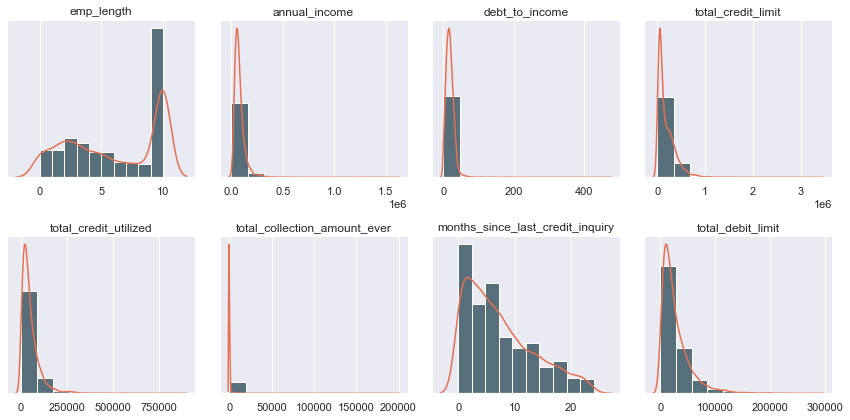

In [12]:
from ds_toolbox import plot_dists
import matplotlib.pyplot as plt

fig = plot_dists(data_train[continuous_var[:8]],plots_in_col = 4)
plt.savefig('doc/Histgram of skewed variables.png')

In [13]:
from ds_toolbox import dp_outliers_IQR

X_train, X_test, skewed_var = dp_outliers_IQR(data_train, skew_threshold = 3, fit_test = True, X_test = data_test)
data_train[skewed_var] = X_train
data_test[skewed_var] = X_test

# categorical

In [14]:
data_train[categorical].head()

,state,homeownership,verified_income,public_record_bankrupt,loan_purpose,application_type,term,grade,sub_grade,loan_status,initial_listing_status,disbursement_method
0,WA,MORTGAGE,Not Verified,0,home_improvement,individual,36,A,A3,Current,whole,Cash
1,CO,MORTGAGE,Verified,0,credit_card,individual,36,A,A5,Current,whole,DirectPay
2,OH,MORTGAGE,Not Verified,1,debt_consolidation,individual,36,A,A5,Current,whole,Cash
3,MD,MORTGAGE,Not Verified,0,credit_card,individual,60,C,C2,Current,whole,Cash
4,NY,RENT,Verified,0,other,individual,36,B,B2,Current,fractional,Cash


In [15]:
categorical_var = categorical

# date

In [16]:
data_train[date].value_counts()

issue_month
Mar-2018       2557
Jan-2018       2349
Feb-2018       2094
dtype: int64

In [17]:
categorical_var = categorical_var.append(date)

# free string

In [18]:
from ds_toolbox import plot_dist

In [19]:
data_train[free_string].value_counts()

emp_title                
manager                      154
owner                        151
teacher                      137
driver                        87
sales                         71
                            ... 
frontend manager               1
fts                            1
fuel and lube technician       1
fuel transport driver          1
zone manager                   1
Length: 3554, dtype: int64

In [20]:
from ds_toolbox import plot_density

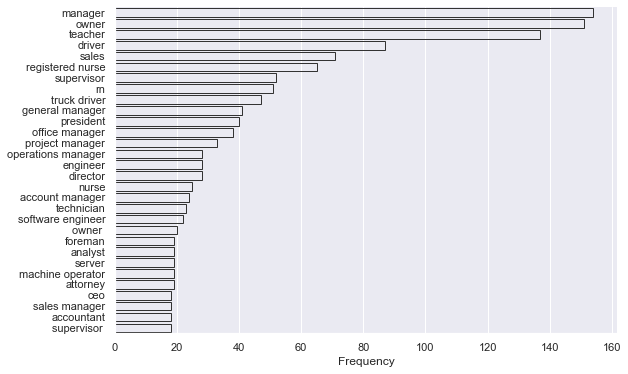

In [21]:
fig = plot_density(data_train.emp_title, num = 30)
plt.savefig("doc/hist.png")

In [22]:
from ds_toolbox import dp_sparsity2other

In [23]:
X_train, X_test, vals = dp_sparsity2other(data_train.emp_title, freq_threshold = 20, values = 'Others', fit_test = True, X_test = data_test.emp_title)

In [24]:
data_train.emp_title = X_train
data_test.emp_title = X_test

In [25]:
categorical_var = categorical_var.tolist()
categorical_var.append('emp_title')

# useless

In [26]:
data_train[useless[:5]]

,num_collections_last_12m,current_accounts_delinq,num_accounts_120d_past_due,num_accounts_30d_past_due,tax_liens
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
6995,0.0,0.0,0.0,0.0,0.0
6996,0.0,0.0,0.0,0.0,0.0
6997,0.0,0.0,0.0,0.0,0.0
6998,0.0,0.0,0.0,0.0,0.0


In [27]:
useless

Index(['num_collections_last_12m', 'current_accounts_delinq',
       'num_accounts_120d_past_due', 'num_accounts_30d_past_due', 'tax_liens',
       'paid_late_fees'],
      dtype='object')

In [28]:
data_train = data_train.drop(useless,axis = 1)
data_test = data_test.drop(useless,axis = 1)

# categorical variables handling

In [29]:
X_train_category = data_train.iloc[:,data_train.columns.isin(categorical_var)]
X_test_category = data_test.iloc[:,data_test.columns.isin(categorical_var)]

In [30]:
X_train_category = X_train_category.fillna('Missing')
X_test_category = X_test_category.fillna('Missing')

In [31]:
X_train_dm = pd.get_dummies(X_train_category,drop_first=True)
X_test_dm = pd.get_dummies(X_test_category,drop_first=True)

In [32]:
dum_col = X_train_dm.columns[X_train_dm.columns.isin(X_test_dm.columns)]
X_train_dm = X_train_dm[dum_col]

# Missing imputation

In [33]:
X_train_num = data_train.iloc[:,~data_train.columns.isin(categorical_var)].drop('interest_rate',axis = 1)
X_test_num = data_test.iloc[:,~data_test.columns.isin(categorical_var)].drop('interest_rate',axis = 1)
y_train = data_train['interest_rate']
y_test = data_test['interest_rate']

In [34]:
from ds_toolbox import dp_mv_imputation

In [35]:
X_train_num, X_test_num = dp_mv_imputation(X_train = X_train_num, fit_test = True, X_test = X_test_num)

# EDA with reponse

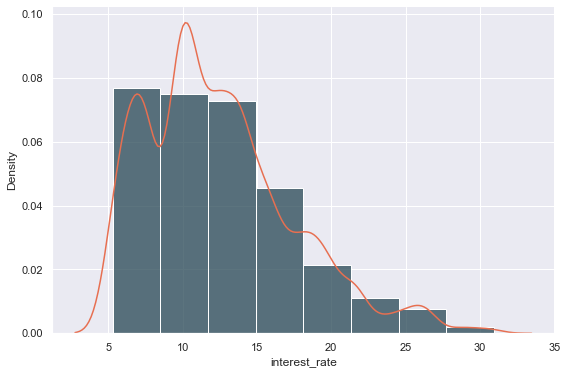

In [36]:
fig = plot_dist(y_train,bins = 8)
plt.savefig('doc/response.png')

In [37]:
y_train = np.log(y_train)

In [38]:
from ds_toolbox import plot_regressions

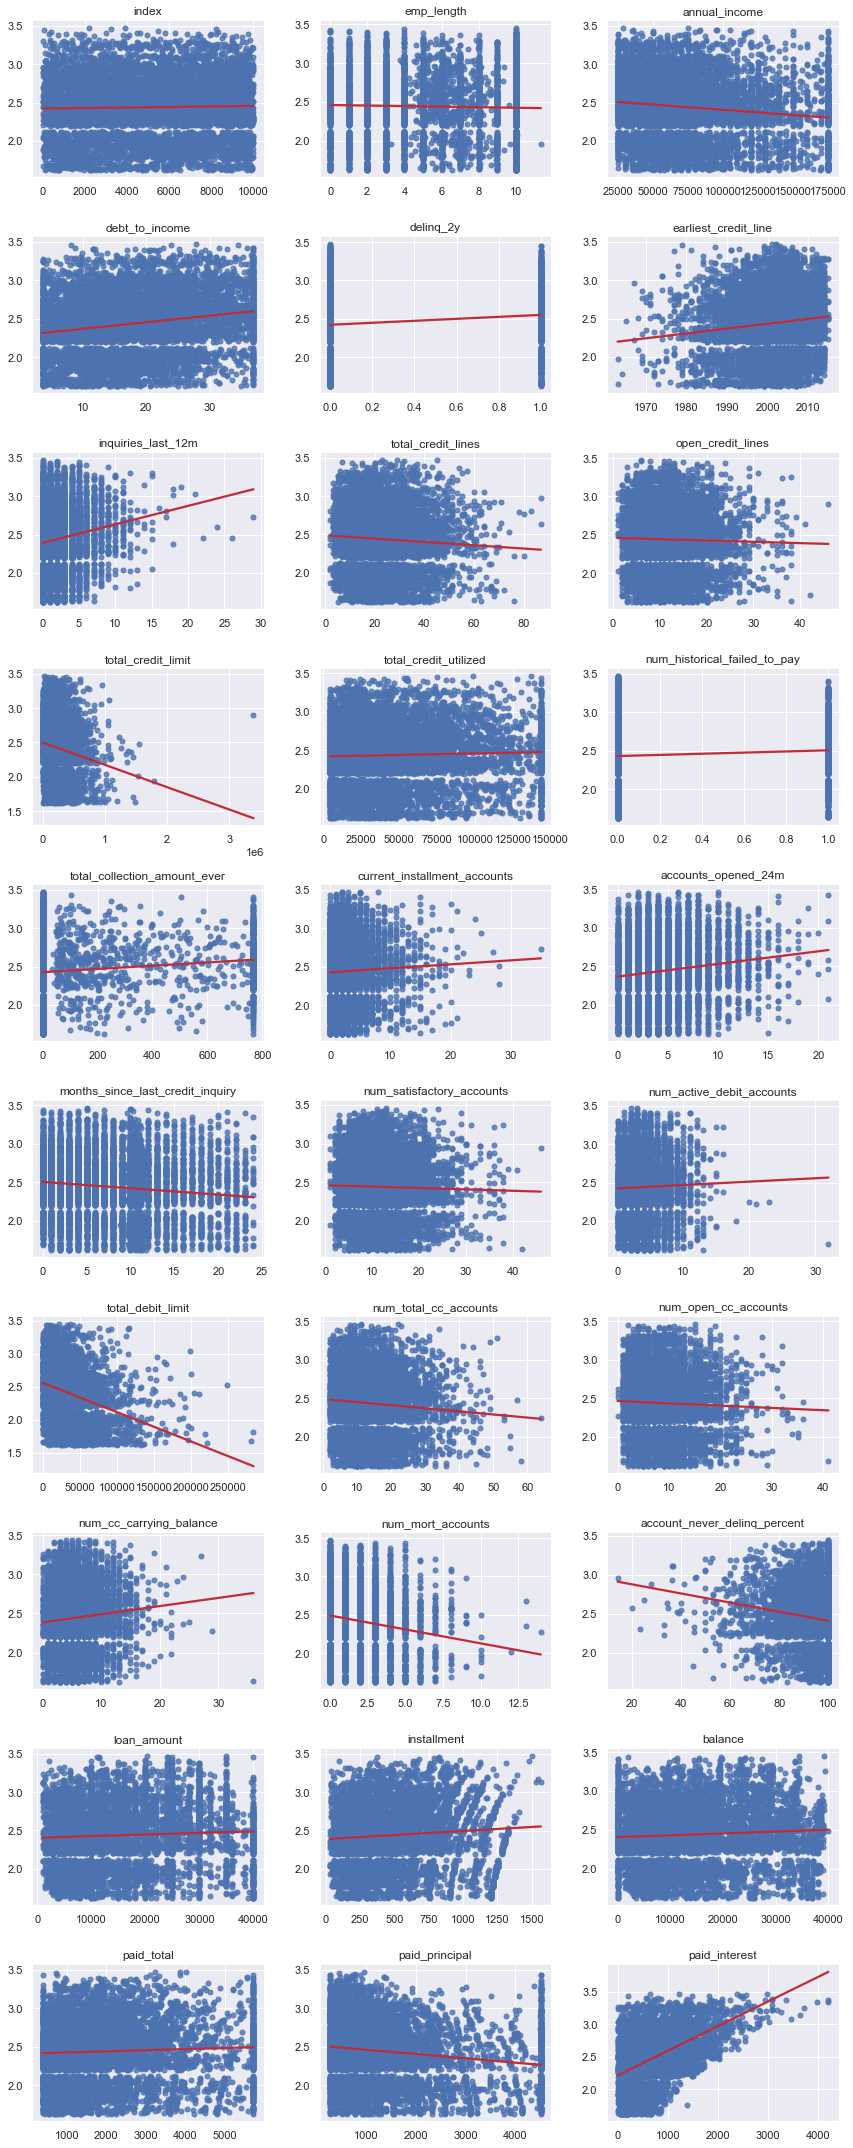

In [39]:
plot_regressions(X_train_num, y_train)
fig = plt.savefig("doc/multiple_regplot.png")

In [40]:
from ds_toolbox import plot_correlation_matrix

In [41]:
cor = pd.concat([X_train_num,y_train],axis=1).corr()['interest_rate'].sort_values(ascending=False)
idx_cols = cor[abs(cor)>0.1].index.tolist()
idx_cols.remove('interest_rate')

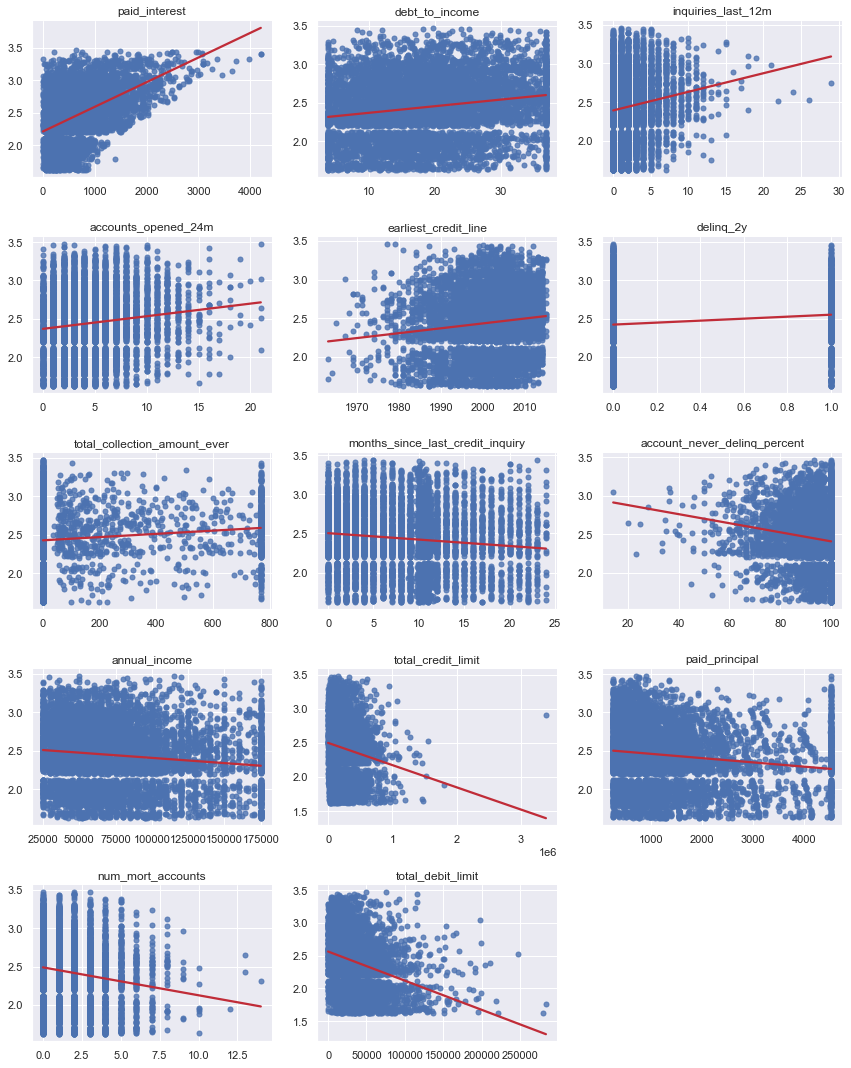

In [42]:
plot_regressions(X_train_num[idx_cols], y_train,)
fig = plt.savefig("doc/Regplot_Response.png")


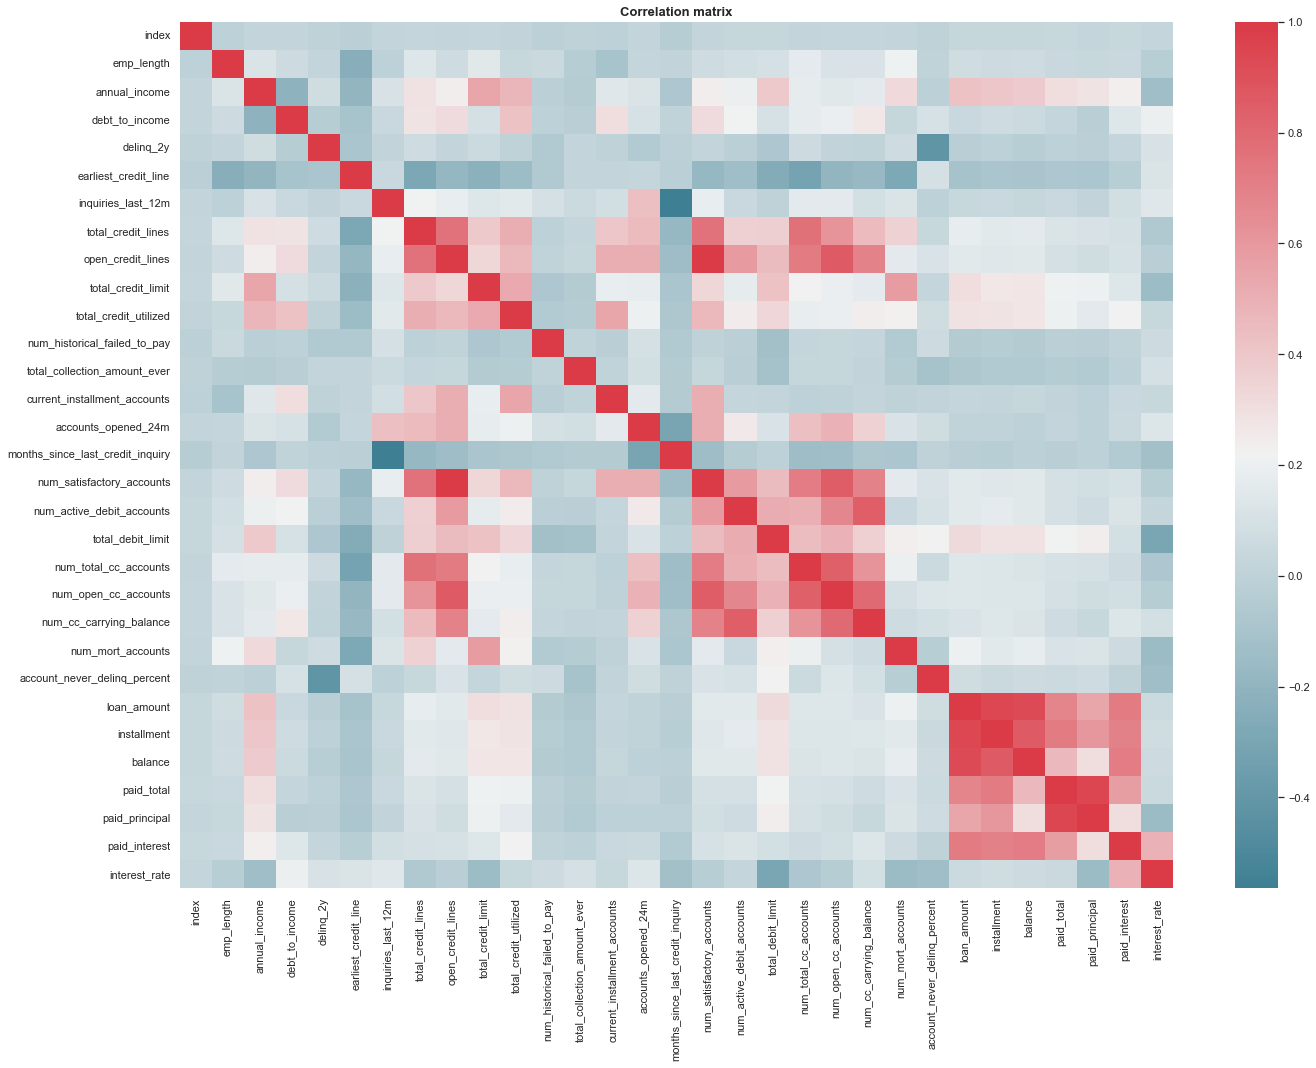

In [43]:
fig = plot_correlation_matrix(pd.concat([X_train_num,y_train],axis=1),figsize = (20,15))
plt.savefig('doc/Heatmap')

In [44]:
import pandas as pd
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
po.init_notebook_mode(connected = True)

In [46]:
map_df = data[['state','interest_rate']]
map_df = map_df.groupby('state').mean().reset_index(drop=False)

plotly_data = dict(type = 'choropleth', 
            locations = map_df['state'], 
            locationmode = 'USA-states', 
            z = map_df.interest_rate, 
            text = map_df['state'])

layout = dict(title = 'USAs Interest rate', 
              geo = dict(scope = 'usa' , 
                         showlakes = True, 
                         lakecolor = 'rgb(0,191,255)'))
x = pg.Figure(data = [plotly_data], 
              layout = layout)
po.iplot(x)
x.write_html('doc/interest_rate.html')

In [47]:
map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          50 non-null     object 
 1   interest_rate  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 928.0+ bytes


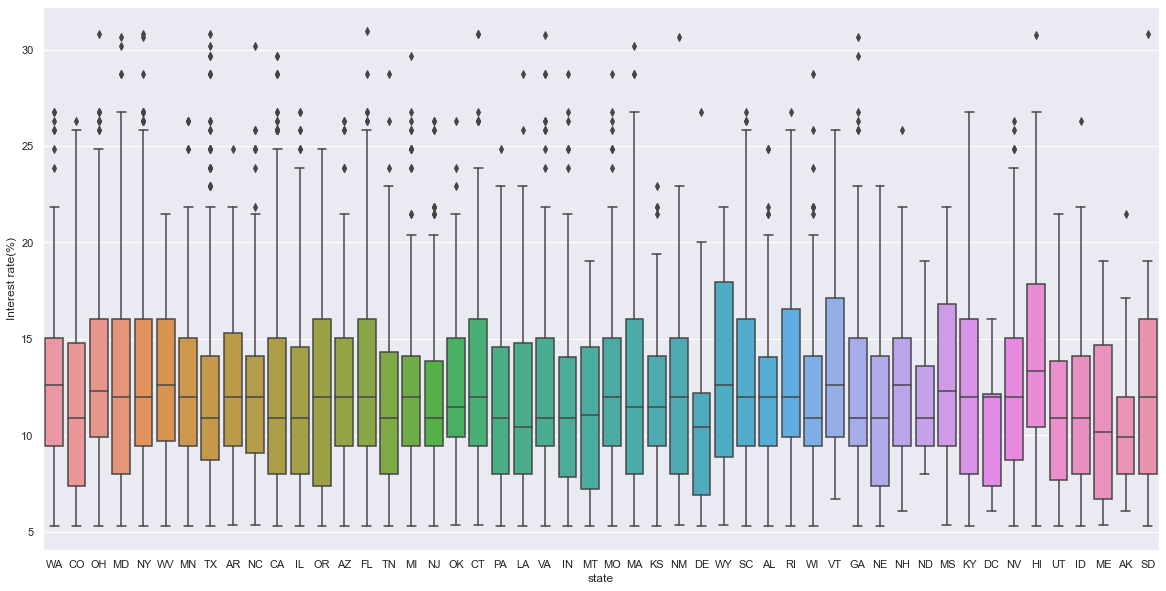

In [48]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(y="interest_rate",x = 'state', data=data_train)
ax.set_ylabel('Interest rate(%)')
plt.show()
fig.savefig("doc/boxplot.png")

# Modelling

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num.iloc[:,:] = scaler.fit_transform(X_train_num)
X_test_num.iloc[:,:] = scaler.fit_transform(X_test_num)

X_train = pd.concat([X_train_num, X_train_dm],axis = 1)
X_test = pd.concat([X_test_num, X_test_num],axis = 1)

from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()
y_train = scaler_mm.fit_transform(y_train.to_numpy().reshape(-1,1))

In [50]:
X_train = pd.concat([X_train_num, X_train_dm],axis = 1)
X_test = pd.concat([X_test_num, X_test_dm],axis = 1)

# Lasso regression

In [51]:
from sklearn.linear_model import LassoCV

# model fitting
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
lasso_pred = scaler_mm.inverse_transform(lasso_pred.reshape(-1,1))

# ElasticNetCV

In [52]:
from sklearn.linear_model import ElasticNetCV
# model fitting
enet = ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99],cv=5)
enet.fit(X_train, y_train)

enet_pred = enet.predict(X_test)
enet_pred = scaler_mm.inverse_transform(enet_pred.reshape(-1,1))

# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

dt_model = DecisionTreeRegressor()

tuning_parameters = {
    'min_samples_leaf':[_ for _ in range(1,20,5)],
    'max_depth':np.arange(1,30,5),
}

tree = RandomizedSearchCV(dt_model, tuning_parameters,
                         n_iter=20,cv=5,return_train_score=False)
tree.fit(X_train, y_train)

tree_pred = tree.predict(X_test)
tree_pred = scaler_mm.inverse_transform(tree_pred.reshape(-1,1))

# Random forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

%time
rf_model = RandomForestRegressor()

tuning_parameters = {
    'n_estimators':np.arange(100,2000,500),
    'min_samples_leaf': np.arange(1,100,10),
    'max_features':np.arange(1, 50),
}

rf_search = RandomizedSearchCV(rf_model, tuning_parameters,
                              cv=5, n_iter=20,
                              return_train_score=False, n_jobs=-1,
                              random_state = 20)
rf_search.fit(X_train, y_train)

rf_pred = rf_search.predict(X_test)
rf_pred = scaler_mm.inverse_transform(rf_pred.reshape(-1,1))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


/Users/cholian/opt/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/cholian/opt/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/cholian/opt/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/cholian/opt/anaconda3/envs/DS/lib/python3.9/site-packages

In [65]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

def matrics_pred(y_true,y_pred):
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred,multioutput = 'uniform_average')

    return r2,mape

model_list = ['lasso','enet','tree','rf_model','lasso+rf']
pred_list = np.exp([lasso_pred, enet_pred,tree_pred,rf_pred,(lasso_pred+rf_pred)/2])

# evaluation
mape_ls = []
r2_ls = []
for i in range(len(pred_list)):
    r2,mape = matrics_pred(y_test,pred_list[i])
    mape_ls.append(mape)
    r2_ls.append(r2)

In [66]:
result = pd.DataFrame({'model':model_list,'MAPE':mape_ls,'R2':r2_ls})
result

,model,MAPE,R2
0,lasso,0.051143,0.924936
1,enet,0.051257,0.924712
2,tree,0.000522,0.999875
3,rf_model,0.008468,0.990391
4,lasso+rf,0.028766,0.965907


In [90]:
final_result = np.exp(((lasso_pred+rf_pred)/2)).reshape(1,-1).tolist()

In [93]:
pd.DataFrame({'Final prediction': final_result[0],'True test values': y_test.values.tolist()})

,Final prediction,True test values
0,6.312073,6.08
1,14.517657,15.04
2,14.565900,15.04
3,7.491747,7.96
4,13.551010,13.59
...,...,...
2995,10.589689,10.42
2996,12.756806,12.62
2997,7.736285,7.97
2998,10.683247,10.90
